# **ERIK SANTANA MONTELONGO**

# **GaussianNB**

In [1]:
# importación de datos
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [2]:

# separamos datos de entrada y salida
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
# separamos train y test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, test_size=0.33, random_state=1)


In [3]:
# 1. elegimos clasificador
from sklearn.naive_bayes import CategoricalNB
# 2. instanciamos el modelo
model = CategoricalNB()
# 3. Entrenamiento con los datos
# Importante: No es necesario realizar una conversión de variable categóricas a nuemrícas en ytrain porque
#             el modelo está diseñado/pensado para trabajar directamente con variables categóricas.
model.fit(Xtrain, ytrain)

CategoricalNB()

In [4]:
model.class_count_ # Muestra el núemro de ejemplares/valores para cada una de las clases

array([33., 31., 36.])

In [5]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# 4. Predicción con nuevos datos
y_model = model.predict(Xtest)

In [7]:
# 5 evaluación
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model) # Precisión del modelo


0.98

In [8]:
# Y finalmente visualizamos la Matriz de Confusión, para lo que se crea la siguiente función, que se llamará más adeante

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# y_true : dataframe -> Los valores de las clases que son ciertos (test)
# y_pred : ndarray     -> Los valores calcuylados de las clases después de realizar la predicción
# class  : ndarray     -> Los nombres de las clases/valores objetivos

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

In [9]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
ytest_df= ytest.to_frame()
ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
ytest_df

<ipython-input-9-15a68d093cb8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
<ipython-input-9-15a68d093cb8>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytest_df['species'].replace(['setosa', 'versicolo

,species
14,0
98,1
75,1
16,0
131,2
56,1
141,2
44,0
29,0
120,2


In [10]:
# Transformamos variables categóricas a array para poder llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
import pandas as pd
# Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
y_model_df= pd.DataFrame(y_model, columns = ['species'])
y_model_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
# Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
y_model_array = y_model_df['species'].to_numpy()
y_model_array

<ipython-input-10-6035c3328e5d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  y_model_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
<ipython-input-10-6035c3328e5d>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_model_df['species'].replace(['setosa', 'ver

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1, 2, 0, 0, 0, 1])

Confusion matrix, without normalization
[[17  0  0]
 [ 0 18  1]
 [ 0  0 14]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

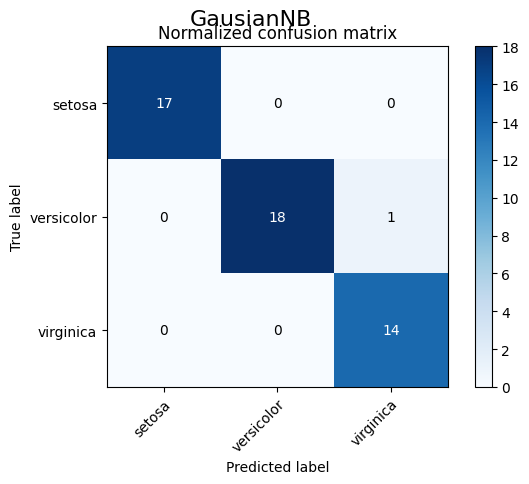

In [11]:
import numpy as np
# Creamos este array porque es el parámetro con las clases que espera la función
clases_iris = np.array(['setosa', 'versicolor', 'virginica'])
plot_confusion_matrix(ytest_df['species'], y_model_array, classes=clases_iris, normalize=False, title='Normalized confusion matrix', titleSup='GausianNB')

# **MultinomialNB**

<ipython-input-12-fbbca3c5160d>:73: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2], inplace=True)
<ipython-input-12-fbbca3c5160d>:73: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytest_df['species'].replace(['setosa', 'vers

Confusion matrix, without normalization
[[17  0  0]
 [ 0  1 18]
 [ 0  0 14]]


<Axes: title={'center': 'Confusion Matrix for MultinomialNB'}, xlabel='Predicted label', ylabel='True label'>

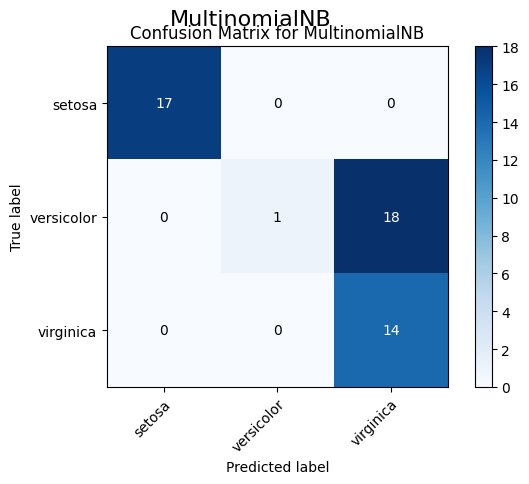

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Creamos y entrenamos el modelo MultinomialNB
model = MultinomialNB()
model.fit(Xtrain, ytrain)

# Realizamos la predicción en el conjunto de prueba
y_model = model.predict(Xtest)

# Función para plotear la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

# Transformamos ytest y y_model a valores numéricos para la matriz de confusión
ytest_df = ytest.to_frame()
ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2], inplace=True)
ytest_array = ytest_df['species'].to_numpy()

y_model_df = pd.DataFrame(y_model, columns=['species'])
y_model_df['species'].replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2], inplace=True)
y_model_array = y_model_df['species'].to_numpy()

# Llamamos a la función para graficar la matriz de confusión
plot_confusion_matrix(ytest_array, y_model_array, classes=np.array(['setosa', 'versicolor', 'virginica']),
                      title="Confusion Matrix for MultinomialNB", titleSup="MultinomialNB")


# **ComplementNB**

Confusion matrix, without normalization
[[17  0  0]
 [ 0  0 19]
 [ 0  0 14]]


<ipython-input-13-e9ca6acdb2e9>:73: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2], inplace=True)
<ipython-input-13-e9ca6acdb2e9>:73: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytest_df['species'].replace(['setosa', 'vers

<Axes: title={'center': 'Confusion Matrix for ComplementNB'}, xlabel='Predicted label', ylabel='True label'>

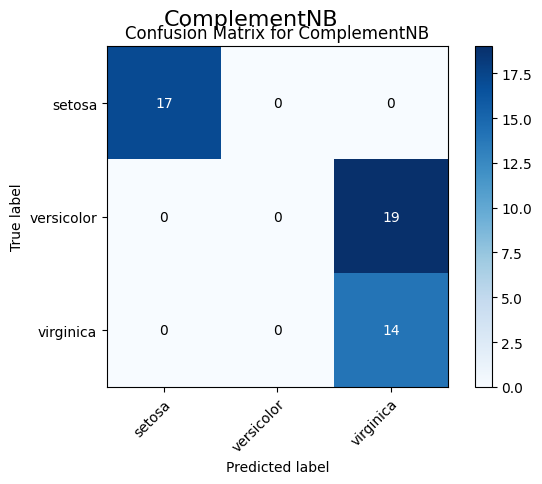

In [13]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Creamos y entrenamos el modelo ComplementNB
model = ComplementNB()
model.fit(Xtrain, ytrain)

# Realizamos la predicción en el conjunto de prueba
y_model = model.predict(Xtest)

# Función para plotear la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

# Transformamos ytest y y_model a valores numéricos para la matriz de confusión
ytest_df = ytest.to_frame()
ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2], inplace=True)
ytest_array = ytest_df['species'].to_numpy()

y_model_df = pd.DataFrame(y_model, columns=['species'])
y_model_df['species'].replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2], inplace=True)
y_model_array = y_model_df['species'].to_numpy()

# Llamamos a la función para graficar la matriz de confusión
plot_confusion_matrix(ytest_array, y_model_array, classes=np.array(['setosa', 'versicolor', 'virginica']),
                      title="Confusion Matrix for ComplementNB", titleSup="ComplementNB")

# **BernoulliNB**

Confusion matrix, without normalization
[[ 0  0 17]
 [ 0  0 19]
 [ 0  0 14]]


<ipython-input-14-90fb055de3cc>:73: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2], inplace=True)
<ipython-input-14-90fb055de3cc>:73: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytest_df['species'].replace(['setosa', 'vers

<Axes: title={'center': 'Confusion Matrix for BernoulliNB'}, xlabel='Predicted label', ylabel='True label'>

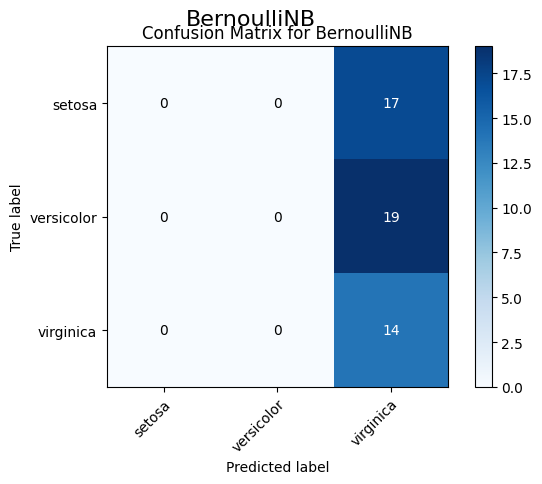

In [14]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Creamos y entrenamos el modelo BernoulliNB
model = BernoulliNB()
model.fit(Xtrain, ytrain)

# Realizamos la predicción en el conjunto de prueba
y_model = model.predict(Xtest)

# Función para plotear la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

# Transformamos ytest y y_model a valores numéricos para la matriz de confusión
ytest_df = ytest.to_frame()
ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2], inplace=True)
ytest_array = ytest_df['species'].to_numpy()

y_model_df = pd.DataFrame(y_model, columns=['species'])
y_model_df['species'].replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2], inplace=True)
y_model_array = y_model_df['species'].to_numpy()

# Llamamos a la función para graficar la matriz de confusión
plot_confusion_matrix(ytest_array, y_model_array, classes=np.array(['setosa', 'versicolor', 'virginica']),
                      title="Confusion Matrix for BernoulliNB", titleSup="BernoulliNB")


# **CategoricalNB**

Confusion matrix, without normalization
[[17  0  0]
 [ 0 18  1]
 [ 0  0 14]]


<ipython-input-15-e399133bd393>:72: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2], inplace=True)
<ipython-input-15-e399133bd393>:72: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytest_df['species'].replace(['setosa', 'vers

<Axes: title={'center': 'Confusion Matrix for CategoricalNB'}, xlabel='Predicted label', ylabel='True label'>

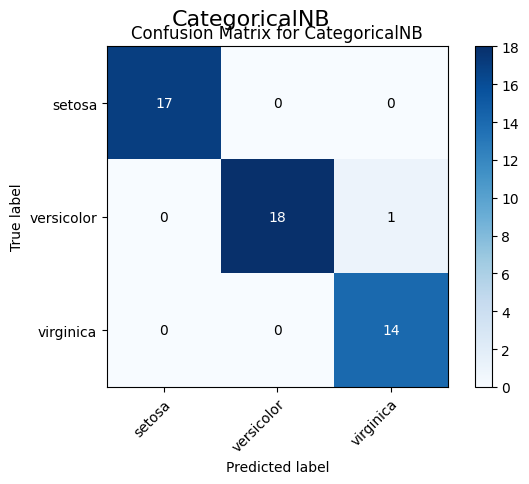

In [15]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import numpy as np

# Creamos y entrenamos el modelo CategoricalNB
model = CategoricalNB()
model.fit(Xtrain, ytrain)

# Realizamos la predicción en el conjunto de prueba
y_model = model.predict(Xtest)

# Función para plotear la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

# Transformamos ytest y y_model a valores numéricos para la matriz de confusión
ytest_df = ytest.to_frame()
ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2], inplace=True)
ytest_array = ytest_df['species'].to_numpy()

y_model_df = pd.DataFrame(y_model, columns=['species'])
y_model_df['species'].replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2], inplace=True)
y_model_array = y_model_df['species'].to_numpy()

# Llamamos a la función para graficar la matriz de confusión
plot_confusion_matrix(ytest_array, y_model_array, classes=np.array(['setosa', 'versicolor', 'virginica']),
                      title="Confusion Matrix for CategoricalNB", titleSup="CategoricalNB")


# **CROSS VALIDATION**

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos
iris = sns.load_dataset('iris')

# Separar las variables independientes y dependientes
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

# Dividir los datos en conjuntos de entrenamiento y prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, test_size=0.33, random_state=1)

# Crear un diccionario de modelos
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "CategoricalNB": CategoricalNB()
}

# Inicializar un DataFrame para almacenar los resultados
results = pd.DataFrame(columns=["Modelo", "Sin CrossValidation", "Con CrossValidation"])

# Evaluar cada modelo
for model_name, model in models.items():
    # Sin validación cruzada
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)
    acc_no_cv = accuracy_score(ytest, y_pred)

    # Con validación cruzada (5 folds)
    acc_cv = cross_val_score(model, X_iris, y_iris, cv=5, scoring='accuracy').mean()

    # Añadir resultados a la tabla
    results = pd.concat([
        results,
        pd.DataFrame({"Modelo": [model_name],
                      "Sin CrossValidation": [acc_no_cv],
                      "Con CrossValidation": [acc_cv]})
    ], ignore_index=True)

# Mostrar la tabla comparativa
print(results)


          Modelo  Sin CrossValidation  Con CrossValidation
0     GaussianNB                 0.94             0.953333
1  MultinomialNB                 0.64             0.953333
2    BernoulliNB                 0.28             0.333333
3   ComplementNB                 0.62             0.666667
4  CategoricalNB                 0.98             0.926667


<ipython-input-16-e24632432e6d>:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([


GaussianNB:

Sin validación cruzada: 94% de precisión.
Validación cruzada: 95.33% de precisión.

La validación cruzada es ligeramente superior que sin usarla.

MultinomialNB:

Sin validación cruzada: 64% de precisión.
Validación cruzada: 95.33% de precisión.

En este caso la validación cruzada nos da un resultado mucho mejor.

BernoulliNB:

Sin validación cruzada: 28% de precisión.
Validación cruzada: 33.33% de precisión.

Da un resultado bastante bajo en ambas configuraciones, no se termina de ajustar bien al algoritmo.

ComplementNB:

Sin validación cruzada: 62% de precisión.
Validación cruzada: 66.67% de precisión.

Como en el Gaussian, obtenemos un resultado ligeramente mejor usando la validación cruzada

CategoricalNB:

Sin validación cruzada: 98% de precisión.
Validación cruzada: 92.67% de precisión
.
Este modelo es muy bueno en ambas, pero a diferencia de los otros la validación cruzada no le beneficia tanto, haciendo que su precisión sea un poquito más baja
